In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customers-dataset/Customers.csv


**About Dataset**
---

**Shop Customer Data** is a comprehensive dataset that provides a **detailed analysis** of a **hypothetical shop's ideal customers**. By collecting and analyzing customer data through **membership cards**, this dataset provides valuable insights that can help a **business better understand its customers**.

The dataset includes **2000 records and 8 columns**, providing a **wealth of information** about the **shop's customer base**. Each column represents a specific aspect of the customer's profile, including their **unique Customer ID, Gender, Age, Annual Income, Spending Score, Profession, Work Experience, and Family Size.**

By analyzing this data, businesses can gain **valuable insights** into their **customers' preferences**, **behaviors, and purchasing habits**. For example, they can **segment customers** by **age, income, or family size** to better understand how these factors impact their purchasing decisions.

* **Customer ID**: A unique identifier assigned to each customer in the dataset. It is used to differentiate between individual customers and to keep track of their purchases and other behaviors.

* **Gender**: The gender of the customer, either male or female. Gender can be used to analyze purchasing behavior and preferences between genders.

* **Age**: The age of the customer, usually measured in years. Age can be used to segment customers into different age groups, which can help identify purchasing patterns and preferences among different age groups.

* **Annual Income**: The annual income of the customer, usually measured in dollars or another currency. Annual income can be used to segment customers into different income groups, which can help identify purchasing patterns and preferences among different income levels.

* **Spending Score**: A score assigned by the shop based on the customer's behavior and spending nature. This score can be used to segment customers based on their purchasing patterns, such as high-spending customers, low-spending customers, and customers who are likely to make impulse purchases.

* **Profession**: The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.

* **Work Experience**: The number of years of work experience of the customer. This feature can be used to segment customers based on their level of experience, which can help identify purchasing patterns and preferences among different experience levels.

* **Family Size**: The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns and preferences among different family sizes, such as families with children versus families without children.

In [2]:
# Data
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# **Data Loading & Processing**
---

In [3]:
# Specify the data path
data_path = '/kaggle/input/customers-dataset/Customers.csv'

# Read the file 
df = pd.read_csv(data_path) # (df is abbreviation for Data Frame)

# Quick look at the data 
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [6]:
# Inpute the missing value by the Model Value
df.fillna({'Profession': 'mode'}, inplace=True)

# Quick check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

# **Data Visualization**
---

**Data visualization** is a process of **creating visual representations** of data to facilitate the **exploration, interpretation, and communication of patterns** and **relationships within the data**. It is a **powerful tool** for **understanding complex data** and **communicating insights effectively**.

In [7]:
# Obtain the count of each gender in the dataset
gender_count = df['Gender'].value_counts()

# Create a pie chart to visualize the distribution of gender in the dataset
fig = px.pie(values=gender_count, names=gender_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Distribution of Gender in the Dataset")

# Create a bar chart to visualize the distribution of gender in the dataset 
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Display the plot
fig.show()
fig2.show()

In [8]:
# Create a box plot of Age by Gender
age_gender_boxplot = px.box(df, x='Gender', y='Age', color='Gender', title='Distribution of Age by Gender')

# Display the plot
age_gender_boxplot.show()

In [9]:
# Create a box plot of Age by Gender
anual_income_gender_boxplot = px.box(df, x='Gender', y='Annual Income ($)', color='Gender', title='Distribution of Anual Income ($) by Gender')

# Display the plot
anual_income_gender_boxplot.show()

In [10]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Age', marginal='violin')

# Display the plot
fig.show()

In [11]:
# Create violin plot for Age versus Profession
fig1 = px.violin(df, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

# Create box plot for Age versus Profession
fig2 = px.box(df, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

# Display the plots
fig1.show()
fig2.show()

In [12]:
# Create a density contour plot to show the relationship between age and work experience
fig1 = px.density_contour(df, x='Age', y='Work Experience', title='Density Contour Plot')

# Create a density heatmap to show the distribution of age and work experience
fig2 = px.density_heatmap(df, x='Age', y='Work Experience', title='Density Heatmap')

# Show the plots
fig1.show()
fig2.show()

In [13]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Annual Income ($)', marginal='violin')

# Display the plot
fig.show()

In [14]:
# Create a box plot for annual income grouped by profession
fig = px.box(df, y='Annual Income ($)', x='Profession', color="Profession")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

In [15]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Spending Score (1-100)', marginal='box')

# Display the plot
fig.show()

In [16]:
# Extracting the count of each profession from the dataframe and storing in profession_dis
profession_dis = df.Profession.value_counts()

# Extracting the names of each profession from the profession_dis index
names = profession_dis.index

# Creating a pie chart to visualize the distribution of profession data values
fig = px.pie(values=profession_dis, names=names, color=names)

# Setting the title of the plot
fig.update_layout(title_text='Distribution of Profession Data Values')

# Displaying the plot
fig.show()

In [17]:
# Create a box plot for annual income grouped by profession
fig = px.box(df, y='Work Experience', x='Profession', color="Gender")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

Upon analyzing the **box plot** for **work experience across different professions**, several **important insights** can be observed. 

* Notably, the **healthcare, executive, doctor, and marketing** department have a **higher overall range of work experience** compared to other sectors. However, it is worth noting that the **lawyer and entertainment sectors** have a **median work experience** of **only one year**, which is **relatively low**. While the distribution for both sectors is reasonable, starting at a **low of one year and going up to around seven years**, the **median values are not satisfactory**. 

* In contrast, the **healthcare, executive and doctor's median work experience range** from **one year to around eight years**, which is expected given the **nature of their work**. Although the **median experience for doctors is lower than healthcare and executive departments**, standing at just **two years, which is again unsatisfactory**.

* Furthermore, **some exceptional outliers** can be observed in the data, such as the **professional with a work experience of 17 years** in the **lawyer and artist sectors, which is impressive**. However, the most crucial aspect that deserves attention is the **homemaker profession**, which has a significantly **higher range of work experience**, starting from around **three years and going up to nine years**. This is **not surprising**, as once someone enters this profession, they are **less likely to leave it for an extended period.** Moreover, the **median value is also high**, with **the maximum median value** in the **whole distribution** being around **seven years**. This indicates that individuals in this profession are **likely to work for at least seven years**.

* When considering **gender differences**, noticeable variations can be observed in the data distribution. The **median value** changes **significantly** for some professions when comparing **males and females**. For instance, in **healthcare**, the **median value is low for females and high for males**. This could be due to the **profession of nurse and doctor**, where **doctors are generally perceived as male**, and **nurses as female**.

* Interestingly, in engineering, the **median experience value** for **females is much higher** than that of **males**. **Females have a median work** experience value of **four years**, while **males have only around one or two years**. Similarly, **for doctors**, **females have a work experience of one year, whereas males have three years**, even though the **overall range is roughly the same**. 

* Lastly, for the **homemaker profession**, the **top values** for **both men and women** are the same, but the **bottom values differ**. It appears that **men start as homemakers earlier than women**, with a **work experience of around two years**, while women have a **lowest work experience of four years**. Nonetheless, the **median value is the same for both genders**.

----
Upon analyzing the data set, it seems that there are no significant data distributions or new insights to be found. I have created several plots, but none of them have uncovered any groundbreaking information.

# **Data Preprocessing**
----

Now that we have a **good understanding** of **how the data is distributed** and what **insights** it represents, we can move on to the **crucial step** of **data preprocessing.** This step involves **cleaning and transforming** the **data to prepare it for analysis.** 

In [18]:
# define the categorical columns.
categorical_columns = ['Gender', 'Profession']

# define the remarkable columns.
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

In [19]:
# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:
    
    # Initialise label encoder.
    encoder = LabelEncoder()
    
    # Apply transformation.
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


In [21]:
# Initialise standard scalar.
scaler = StandardScaler()

# Rescaled data.
df.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(df)

In [22]:
# Quick Look
full_data[:5]

array([[ 1.20706357, -1.05408932, -2.09350095, -0.42833854,  0.77835593,
        -0.79120713,  0.11749744],
       [ 1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.35434734,
        -0.28116224, -0.39005088],
       [-0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.35434734,
        -0.79120713, -1.40514752],
       [-0.82845678, -0.91335643, -1.13129172,  0.93231889,  1.53349144,
        -1.04622958, -0.8975992 ],
       [-0.82845678, -0.63189066, -1.59052794, -0.39253176,  0.02322042,
        -0.53618469,  1.13259408]])

# **Data Correlation**

In [23]:
# Calculate correlation
corr = df.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()


# **Principal Component Analysis**
---

**PCA (Principal Component Analysis)** is a **statistical technique** used to **simplify complex data sets by reducing the number of variables** while retaining the **important information.** It is a **popular technique** in **data analysis** and **machine learning** for **feature extraction, dimensionality reduction, and data visualization**.

The goal of **PCA** is to **identify** the **patterns in high-dimensional data** by identifying a **new set of variables**, called **principal components**, that **account for most of the variance in the data**. These components are **linear combinations** of the **original variables** and are computed in such a way that the **first principal component has the highest possible variance**, and **each succeeding component** in turn has the **highest variance possible** under the **constraint** that it is **orthogonal to the preceding components**.

**PCA** works by finding the **eigenvectors and eigenvalues** of the **covariance matrix of the data**. The **eigenvectors** represent the **directions** of **maximum variance in the data**, and the **eigenvalues** represent the **amount of variance explained by each eigenvector**. The **eigenvectors** with the **highest eigenvalues are the principal components**.

By projecting the data **onto the principal components**, we can obtain a **lower-dimensional representation** of the **data** that captures most of the **important information**. This can be useful for **visualization**, as it allows us to **plot the data** in **two or three dimensions**, which can be easier to interpret than high-dimensional data. It can also be useful for **reducing the dimensionality of the data** before applying other **machine learning algorithms**, as it can help to **reduce overfitting and improve computational efficiency.**


In [24]:
# Instantiate a PCA object with 2 components for 2D data
pca_2D = PCA(n_components=2, random_state=42)

# Fit and transform the data to obtain the 2D projection
data_2D = pca_2D.fit_transform(full_data)


# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(full_data)

# **K-Means Clustering**
---

**K-means clustering** is a **popular unsupervised machine learning algorithm** that aims to group **similar data points together** in a dataset. The algorithm takes in a dataset and the **desired number of clusters (k),** then it **randomly selects k data points** to serve as the **initial centroids** for the **clusters**. It then assigns **each data point** in the dataset to the **nearest centroid,** creating **k clusters**.

Next, the **algorithm computes the mean (center)** of **each cluster** and **moves the centroid** to this **new location**. It then **re-assigns each data point to the nearest centroid again**, and **repeats the process of computing new cluster means** and **re-assigning data points** until the **centroids no longer move** or a **maximum number of iterations is reached**.

The output of the **K-means algorithm** is the **final centroids** and the **assignment of each data point to its corresponding cluster**. The goal of the algorithm is to **minimize the sum of squared distances** between **each data point and its assigned centroid**, known as the **Within-Cluster Sum of Squares (WCSS).**

![image.png](attachment:c958dfad-cd6c-42b6-88eb-7f6e7a3cd049.png)

Here we are not sure about the correct number of clusters, so we will have to find the best possible value of "K"

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px

# Create a list to store the sum of squared distances (SSD) for each k
ssd = []

# Fit KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init added explicitly
    kmeans.fit(full_data)
    ssd.append(kmeans.inertia_)

# Create a new DataFrame (avoid overwriting original df)
ssd_df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# Create the Elbow plot using Plotly Express
fig = px.line(ssd_df, x='k', y='ssd', title='Elbow Method for Optimal K')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Sum of Squared Distances (SSD)')
fig.show()

## **Elbow Method**
---

The **Elbow method** is a **heuristic** used to **determine the optimal number of clusters** to use in a **K-means clustering algorithm.** The method involves plotting the **explained variation** as a function of the **number of clusters** and picking the **elbow** of the **curve as the number of clusters to use**. The **explained variation** is defined as the **Sum of Squared Distances** between the **data points and their assigned cluster centers**, also known as the **Within-Cluster Sum of Squares (WCSS)**.

The intuition behind the **Elbow method** is that as the **number of clusters increases**, the **WCSS** will **generally decrease** because each **data point will be closer** to its **assigned cluster center**. However, **beyond a certain point**, the **marginal gain** in **WCSS reduction** will start to **diminish**, resulting in a **flattening of the curve**. This **point of flattening** is referred to as the **"elbow,"** and it represents the **optimal number of clusters to use**.

In [26]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

# Create a list to store silhouette scores
silhouette_scores = []

# Fit KMeans clustering with k = 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(full_data)
    score = silhouette_score(full_data, kmeans.labels_)
    silhouette_scores.append(score)

# Find the best k (index + 2 because range starts at 2)
best_k = np.argmax(silhouette_scores) + 2

# Plotting using plotly.graph_objects to allow vline
fig = go.Figure()

# Line plot of silhouette scores
fig.add_trace(go.Scatter(x=list(range(2, 11)), y=silhouette_scores,
                         mode='lines+markers', marker=dict(size=8),
                         name='Silhouette Score'))

# Add vertical line at best_k
fig.add_vline(x=best_k, line_dash="dash", line_color="red")
fig.add_annotation(x=best_k, y=max(silhouette_scores),
                   text=f"Best k: {best_k}",
                   showarrow=True, arrowhead=2)

# Update layout
fig.update_layout(title='Silhouette Method for Optimal k',
                  xaxis_title='Number of Clusters (k)',
                  yaxis_title='Silhouette Score')
fig.show()


## **Calinski-Harabasz Index**
---

The **Calinski-Harabasz Index**, also known as the **Variance Ratio Criterion**, is a **clustering evaluation metric** that aims to measure the **ratio between the within-cluster dispersion and the between-cluster dispersion**.

The **within-cluster dispersion** refers to the **average distance** between each data point in a **cluster and the centroid of that cluster**. The **between-cluster dispersion**, on the other hand, refers to the **average distance** between the **centroids of each cluster**.

The formula for the Calinski-Harabasz Index is:

$CH(k) = \frac{B(k)/(k-1)}{W(k)/(n-k)}$

where **CH(k)** is the **Calinski-Harabasz Index** for a given value of **k** (number of clusters), **B(k)** is the **between-cluster dispersion**, **W(k)** is the **within-cluster dispersion,** and **n** is the **total number of data points**.

The **Calinski-Harabasz Index** tries to **maximize** the **ratio** between the **between-cluster dispersion** and the **within-cluster dispersion.** A **higher value** of the **Calinski-Harabasz Index** indicates a **better clustering solution.**

In practice, the **Calinski-Harabasz Index** can be used together with other **clustering evaluation metrics**, such as the **Silhouette Coefficient** and the **Elbow Method**, to determine the **optimal number of clusters for a given dataset.**

In [27]:
from sklearn.cluster import KMeans

# Set number of clusters
k = 2

# Initialize KMeans with best practices
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit the model on the full standardized data
kmeans.fit(full_data)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [28]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()

In [29]:
# Create the 2D scatter plot
fig = px.scatter(
    x=data_2D[:, 0], y=data_2D[:, 1],
    color=labels,
    size_max=5, 
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()


Based on the results of the **K-means clustering algorithm**, we can infer that it **struggled** to **cluster the data points effectively**, with **only two centroids identified**. Upon visualizing these centroids in both **three-dimensional and two-dimensional space**, we can see that the **clusters lack a clear boundary** and are therefore **not well separated**. 

Instead, the **clusters appear to be mixed together**, indicating that the **algorithm failed** to capture the **underlying structure of the data.** While it is promising to find at **least two clusters in the higher-dimensional feature space**, we must acknowledge that the **data may not represent reality as it lacks diversity.**

# **DBSCAN**
---

**DBSCAN** (**Density-Based Spatial Clustering of Applications with Noise**) is a **clustering algorithm** that groups together points that are close to each other based on a **density criterion**. It is particularly useful for **discovering clusters** of **arbitrary shape** in datasets that contain **noise or outliers.**

The algorithm works by **defining a neighborhood** around each point in the dataset based on a specified radius called **epsilon**. Points that have a **minimum number of neighbors** within this **radius are considered as "core points".** Core points are then used to **form clusters**, and **non-core points** that **fall within the radius** of a **core point** are **assigned to the same cluster.** Points that do **not belong to any cluster are considered as noise.**

**DBSCAN** has **two important parameters**: **epsilon and min_samples.** 
* **Epsilon** defines the **radius of the neighborhood** around each point.
* **min_samples** determines the **minimum number of points** required to form a **dense region**. These parameters can be tuned to **achieve the desired clustering results**.

One of the **main advantages** of **DBSCAN** is that it **does not require the number of clusters to be specified** in advance, and it is **robust to noise and outliers.** 

In [30]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(full_data)

# Obtail labels
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)          # -1 stands for noise in the data i.e. outliers

# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    title=f'DBSCAN Clustering({n_clusters} Clusters)')

# Show the plot
fig.show()

In [31]:
# Define the labels and their corresponding opacity values
label_opacity = {
    0: 1.0,        # opacity for label 0
    1: 1.0,        # opacity for label 1
    2: 1.0,        # opacity for label 2
    -1: 0.3        # opacity for label -1
}

# Create separate traces for each label with the corresponding opacity values
traces = []
for label in set(labels):
    opacity = label_opacity[label]
    mask = labels == label
    trace = go.Scatter(
        x=data_2D[mask, 0], y=data_2D[mask, 1],
        mode='markers',
        marker=dict(
            size=5*(opacity*5),
            opacity=opacity
        ),
        name=f'Label {label}'
    )
    traces.append(trace)

# Create the plot
fig = go.Figure(data=traces, layout=go.Layout(
    title='DBSCAN Clustering',
    xaxis_title='X',
    yaxis_title='Y'
))

# Show the plot
fig.show()


According to the **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** algorithm, setting the conditions to **DBSCAN(eps=0.7, min_samples=5),** resulted in the identification of **3 clusters**. However, the **clustering method did not perform exceptionally well** as the **number of sample points** within **each cluster was extremely low**. 

This indicates that the **points were not present in close proximity** to each other in the **higher dimensional space and were not correlated to each other.** This finding is also supported by the **Feature Description method**, as the **features were found to be largely independent of each other when plotted individually**.

This is a **common problem** encountered when working with **ideal datasets**, as the **clusters identified are not perfect** and the **majority of the data is noise.** From a **machine learning and deep learning perspective**, the presence of a **significant amount of noise in the data** can impact **model performance and accuracy**. Therefore, it is important to address this issue **before proceeding with model development.**

---
This observation suggests that the data may not be suitable for clustering or there may be some underlying structure that is not being captured by the clustering algorithms. In such cases, it may be necessary to consider other techniques or algorithms, such as dimensionality reduction or manifold learning, to better understand the data and identify any underlying patterns. Additionally, it may be useful to collect more data or refine the feature selection process to improve the quality of the data and potentially enable better clustering results.



In [32]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import randint

### Load and Prepare Data

In [33]:
df['Spending_Category'] = df['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)

# Drop irrelevant or already used columns
X = df.drop(columns=['Spending Score (1-100)', 'Spending_Category'])
y = df['Spending_Category']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train and Evaluate Baseline Models

In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       200
           1       0.49      0.49      0.49       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400


Model: Random Forest
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       200
           1       0.48      0.48      0.48       200

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.45      0.44      0.45       200
           1       0.46      0.47      0.46       200

    accuracy                           0.46       400
   macro avg       0.45      0.45      0.45       40

### Hyperparameter Tuning - Random Forest

In [35]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print("\nBest Parameters (RF):", grid_rf.best_params_)


Best Parameters (RF): {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


### Hyperparameter Tuning - Gradient Boosting

In [36]:
param_dist_gb = {
    'n_estimators': randint(100, 300),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': randint(3, 10)
}

random_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=param_dist_gb, 
                                n_iter=10, scoring='f1', cv=5, random_state=42)
random_gb.fit(X_train, y_train)
print("\nBest Parameters (GB):", random_gb.best_params_)


Best Parameters (GB): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 157}


### Final Model Evaluation


Final Model Performance (Random Forest):
Accuracy: 0.4525
Precision: 0.4549763033175355
Recall: 0.48
F1 Score: 0.4671532846715328


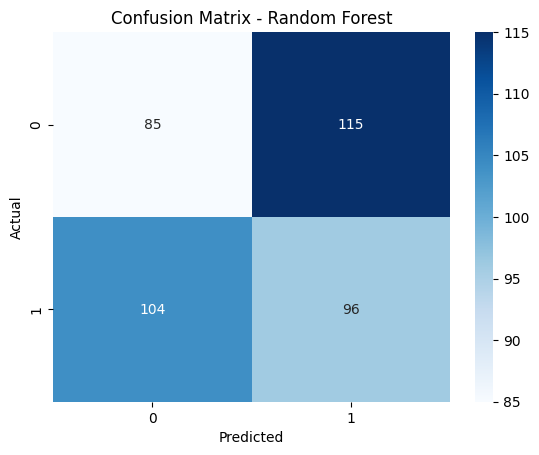

In [37]:
best_model = grid_rf.best_estimator_
y_pred_final = best_model.predict(X_test)

print("\nFinal Model Performance (Random Forest):")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Recommendations and Conclusions

Based on the analysis of customer clusters formed through K-Means clustering, recommendations and conclusions can be drawn to guide business strategies. Here's a template for crafting recommendations and conclusions:

### Recommendations:

#### 1. **Targeted Marketing Campaigns:**
   - Tailor marketing campaigns to the specific needs and preferences of each customer cluster. Design promotions and advertisements that resonate with the characteristics of each group.

#### 2. **Product Customization:**
   - Customize product offerings based on the preferences identified in each cluster. Introduce variations or new products that align with the spending behavior and interests of different customer segments.

#### 3. **Personalized Customer Engagement:**
   - Implement personalized customer engagement strategies for each cluster. Utilize data-driven insights to enhance customer experiences, such as personalized recommendations, exclusive offers, or loyalty programs.

#### 4. **Price Optimization:**
   - Optimize pricing strategies based on the income distribution within clusters. Consider differential pricing or targeted discounts to appeal to the spending capacity of each group.

#### 5. **Customer Retention Strategies:**
   - Develop customer retention strategies that address the unique characteristics of each cluster. Identify factors that contribute to customer loyalty and design retention initiatives accordingly.

#### 6. **Market Expansion Opportunities:**
   - Explore market expansion opportunities based on the geographical distribution of clusters. Identify regions with a higher concentration of specific customer segments for targeted expansion efforts.

### Conclusions:

#### 1. **Customer Segmentation Insights:**
   - The K-Means clustering analysis revealed distinct customer segments based on income and spending behavior. These segments provide valuable insights into the diverse customer base.

#### 2. **Cluster Characteristics:**
   - Clusters exhibit varying income levels and spending patterns, allowing for a nuanced understanding of customer behavior. Some clusters may prioritize high spending, while others may focus on value or specific product categories.

#### 3. **Business Impact:**
   - The identified clusters have direct implications for business strategies, enabling more precise targeting and resource allocation. By tailoring approaches to each cluster, the business is poised to enhance customer satisfaction and drive revenue growth.

#### 4. **Continuous Monitoring and Adaptation:**
   - Customer preferences and behaviors may evolve over time. It's crucial to establish a system for continuous monitoring, analysis, and adaptation of strategies to stay aligned with changing customer dynamics.

#### 5. **Competitive Advantage:**
   - Leveraging the insights gained from customer clustering provides a competitive advantage. By understanding and meeting the unique needs of each segment, the business is better positioned in the market.

#### 6. **Data-Driven Decision-Making:**
   - The success of future strategies depends on continued reliance on data-driven decision-making. Regularly analyze customer data, feedback, and market trends to refine and optimize strategies.